In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/iris3.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

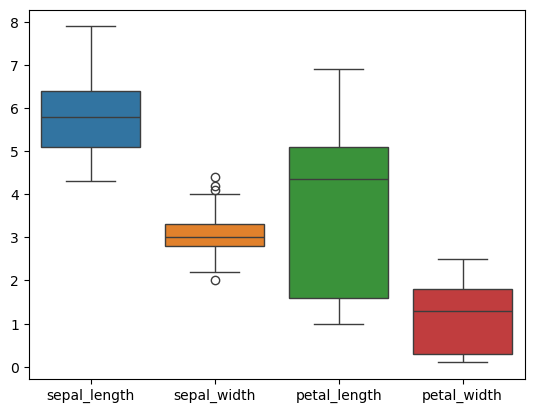

In [5]:
sns.boxplot(data)

In [6]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
X = data.drop("species", axis=1)
y = data['species']

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
y_labeled = le.fit_transform(y)

In [12]:
y_labeled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [15]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y_labeled, test_size=0.3, random_state=10)

In [16]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=10)
dtc.fit(X_train2, y_train2)
pred2 = dtc.predict(X_test2)
print(classification_report(y_test2, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [17]:
y = pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.3, random_state=10)

# Sequential

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-09-10 09:40:39.210832: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 09:40:40.489584: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-10 09:40:40.489818: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-10 09:40:40.494512: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-10 09:40:40.794932: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


In [20]:
X_train.shape

(105, 4)

In [21]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax' ))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________


2024-09-10 09:41:10.451915: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 09:41:10.453874: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) RX Vega 11 Graphics)
2024-09-10 09:41:10.574863: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:41:10.574917: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-10 09:41:10.574942: I tensorflow/core/common_runtime/pluggable_device/pluggab

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=500, batch_size=150, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)                    

Epoch 1/500


2024-09-10 09:41:16.856921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:41:16.912009: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:41:16.912093: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 1s 1s/step - loss: 1.1842 - accuracy: 0.3143 - val_loss: 1.1513 - val_accuracy: 0.3556
Epoch 2/500
1/1 [==============================] - 0s 75ms/step - loss: 1.1811 - accuracy: 0.3143 - val_loss: 1.1488 - val_accuracy: 0.3556
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 1.1782 - accuracy: 0.3143

2024-09-10 09:41:17.571977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:41:17.600413: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:41:17.600555: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 84ms/step - loss: 1.1782 - accuracy: 0.3143 - val_loss: 1.1463 - val_accuracy: 0.3556
Epoch 4/500
1/1 [==============================] - 0s 67ms/step - loss: 1.1752 - accuracy: 0.3143 - val_loss: 1.1438 - val_accuracy: 0.3556
Epoch 5/500
1/1 [==============================] - 0s 80ms/step - loss: 1.1723 - accuracy: 0.3143 - val_loss: 1.1414 - val_accuracy: 0.3556
Epoch 6/500
1/1 [==============================] - 0s 79ms/step - loss: 1.1694 - accuracy: 0.3143 - val_loss: 1.1389 - val_accuracy: 0.3556
Epoch 7/500
1/1 [==============================] - 0s 81ms/step - loss: 1.1665 - accuracy: 0.3143 - val_loss: 1.1365 - val_accuracy: 0.3556
Epoch 8/500
1/1 [==============================] - 0s 74ms/step - loss: 1.1637 - accuracy: 0.3143 - val_loss: 1.1342 - val_accuracy: 0.3556
Epoch 9/500
1/1 [==============================] - 0s 69ms/step - loss: 1.1609 - accuracy: 0.3143 - val_loss: 1.1318 - val_accuracy: 0.3556
Epoch 10/500
1/1 [==============

1/1 [==============================] - 0s 93ms/step - loss: 1.0440 - accuracy: 0.3048 - val_loss: 1.0307 - val_accuracy: 0.3111
Epoch 62/500
1/1 [==============================] - 0s 72ms/step - loss: 1.0420 - accuracy: 0.3143 - val_loss: 1.0288 - val_accuracy: 0.3111
Epoch 63/500
1/1 [==============================] - 0s 65ms/step - loss: 1.0399 - accuracy: 0.3238 - val_loss: 1.0269 - val_accuracy: 0.2889
Epoch 64/500
1/1 [==============================] - 0s 81ms/step - loss: 1.0379 - accuracy: 0.3619 - val_loss: 1.0250 - val_accuracy: 0.2889
Epoch 65/500
1/1 [==============================] - 0s 74ms/step - loss: 1.0358 - accuracy: 0.3905 - val_loss: 1.0232 - val_accuracy: 0.2667
Epoch 66/500
1/1 [==============================] - 0s 71ms/step - loss: 1.0337 - accuracy: 0.4000 - val_loss: 1.0213 - val_accuracy: 0.2667
Epoch 67/500
1/1 [==============================] - 0s 67ms/step - loss: 1.0317 - accuracy: 0.4095 - val_loss: 1.0194 - val_accuracy: 0.3111
Epoch 68/500
1/1 [========

1/1 [==============================] - 0s 74ms/step - loss: 0.9239 - accuracy: 0.6286 - val_loss: 0.9178 - val_accuracy: 0.6222
Epoch 120/500
1/1 [==============================] - 0s 66ms/step - loss: 0.9219 - accuracy: 0.6286 - val_loss: 0.9159 - val_accuracy: 0.6222
Epoch 121/500
1/1 [==============================] - 0s 81ms/step - loss: 0.9199 - accuracy: 0.6286 - val_loss: 0.9141 - val_accuracy: 0.6222
Epoch 122/500
1/1 [==============================] - 0s 74ms/step - loss: 0.9178 - accuracy: 0.6286 - val_loss: 0.9122 - val_accuracy: 0.6222
Epoch 123/500
1/1 [==============================] - 0s 77ms/step - loss: 0.9158 - accuracy: 0.6381 - val_loss: 0.9103 - val_accuracy: 0.6222
Epoch 124/500
1/1 [==============================] - 0s 85ms/step - loss: 0.9138 - accuracy: 0.6381 - val_loss: 0.9085 - val_accuracy: 0.6222
Epoch 125/500
1/1 [==============================] - 0s 91ms/step - loss: 0.9117 - accuracy: 0.6476 - val_loss: 0.9066 - val_accuracy: 0.6222
Epoch 126/500
1/1 [=

Epoch 177/500
1/1 [==============================] - 0s 80ms/step - loss: 0.8110 - accuracy: 0.6857 - val_loss: 0.8171 - val_accuracy: 0.6222
Epoch 178/500
1/1 [==============================] - 0s 75ms/step - loss: 0.8092 - accuracy: 0.6857 - val_loss: 0.8154 - val_accuracy: 0.6222
Epoch 179/500
1/1 [==============================] - 0s 80ms/step - loss: 0.8073 - accuracy: 0.6857 - val_loss: 0.8137 - val_accuracy: 0.6222
Epoch 180/500
1/1 [==============================] - 0s 71ms/step - loss: 0.8055 - accuracy: 0.6857 - val_loss: 0.8121 - val_accuracy: 0.6222
Epoch 181/500
1/1 [==============================] - 0s 84ms/step - loss: 0.8037 - accuracy: 0.6857 - val_loss: 0.8104 - val_accuracy: 0.6222
Epoch 182/500
1/1 [==============================] - 0s 85ms/step - loss: 0.8019 - accuracy: 0.6857 - val_loss: 0.8088 - val_accuracy: 0.6222
Epoch 183/500
1/1 [==============================] - 0s 71ms/step - loss: 0.8001 - accuracy: 0.6857 - val_loss: 0.8071 - val_accuracy: 0.6222
Epoch 

Epoch 235/500
1/1 [==============================] - 0s 98ms/step - loss: 0.7074 - accuracy: 0.6857 - val_loss: 0.7233 - val_accuracy: 0.6222
Epoch 236/500
1/1 [==============================] - 0s 110ms/step - loss: 0.7056 - accuracy: 0.6857 - val_loss: 0.7217 - val_accuracy: 0.6222
Epoch 237/500
1/1 [==============================] - 0s 79ms/step - loss: 0.7038 - accuracy: 0.6857 - val_loss: 0.7201 - val_accuracy: 0.6222
Epoch 238/500
1/1 [==============================] - 0s 83ms/step - loss: 0.7021 - accuracy: 0.6857 - val_loss: 0.7186 - val_accuracy: 0.6222
Epoch 239/500
1/1 [==============================] - 0s 80ms/step - loss: 0.7003 - accuracy: 0.6857 - val_loss: 0.7170 - val_accuracy: 0.6222
Epoch 240/500
1/1 [==============================] - 0s 63ms/step - loss: 0.6986 - accuracy: 0.6857 - val_loss: 0.7154 - val_accuracy: 0.6222
Epoch 241/500
1/1 [==============================] - 0s 77ms/step - loss: 0.6968 - accuracy: 0.6857 - val_loss: 0.7139 - val_accuracy: 0.6222
Epoch

Epoch 293/500
1/1 [==============================] - 0s 89ms/step - loss: 0.6086 - accuracy: 0.6857 - val_loss: 0.6342 - val_accuracy: 0.6222
Epoch 294/500
1/1 [==============================] - 0s 79ms/step - loss: 0.6070 - accuracy: 0.6857 - val_loss: 0.6327 - val_accuracy: 0.6222
Epoch 295/500
1/1 [==============================] - 0s 74ms/step - loss: 0.6055 - accuracy: 0.6857 - val_loss: 0.6312 - val_accuracy: 0.6222
Epoch 296/500
1/1 [==============================] - 0s 74ms/step - loss: 0.6039 - accuracy: 0.6857 - val_loss: 0.6298 - val_accuracy: 0.6222
Epoch 297/500
1/1 [==============================] - 0s 73ms/step - loss: 0.6023 - accuracy: 0.6857 - val_loss: 0.6283 - val_accuracy: 0.6222
Epoch 298/500
1/1 [==============================] - 0s 77ms/step - loss: 0.6007 - accuracy: 0.6857 - val_loss: 0.6269 - val_accuracy: 0.6222
Epoch 299/500
1/1 [==============================] - 0s 79ms/step - loss: 0.5992 - accuracy: 0.6857 - val_loss: 0.6255 - val_accuracy: 0.6222
Epoch 

1/1 [==============================] - 0s 86ms/step - loss: 0.5298 - accuracy: 0.7048 - val_loss: 0.5601 - val_accuracy: 0.6444
Epoch 351/500
1/1 [==============================] - 0s 77ms/step - loss: 0.5287 - accuracy: 0.7048 - val_loss: 0.5590 - val_accuracy: 0.6444
Epoch 352/500
1/1 [==============================] - 0s 83ms/step - loss: 0.5275 - accuracy: 0.7048 - val_loss: 0.5579 - val_accuracy: 0.6444
Epoch 353/500
1/1 [==============================] - 0s 79ms/step - loss: 0.5264 - accuracy: 0.7048 - val_loss: 0.5568 - val_accuracy: 0.6444
Epoch 354/500
1/1 [==============================] - 0s 83ms/step - loss: 0.5253 - accuracy: 0.7048 - val_loss: 0.5557 - val_accuracy: 0.6444
Epoch 355/500
1/1 [==============================] - 0s 88ms/step - loss: 0.5242 - accuracy: 0.7048 - val_loss: 0.5546 - val_accuracy: 0.6444
Epoch 356/500
1/1 [==============================] - 0s 80ms/step - loss: 0.5230 - accuracy: 0.7048 - val_loss: 0.5536 - val_accuracy: 0.6444
Epoch 357/500
1/1 [=

Epoch 408/500
1/1 [==============================] - 0s 72ms/step - loss: 0.4755 - accuracy: 0.7238 - val_loss: 0.5066 - val_accuracy: 0.6444
Epoch 409/500
1/1 [==============================] - 0s 84ms/step - loss: 0.4748 - accuracy: 0.7238 - val_loss: 0.5058 - val_accuracy: 0.6444
Epoch 410/500
1/1 [==============================] - 0s 79ms/step - loss: 0.4740 - accuracy: 0.7238 - val_loss: 0.5050 - val_accuracy: 0.6444
Epoch 411/500
1/1 [==============================] - 0s 83ms/step - loss: 0.4733 - accuracy: 0.7238 - val_loss: 0.5043 - val_accuracy: 0.6444
Epoch 412/500
1/1 [==============================] - 0s 87ms/step - loss: 0.4726 - accuracy: 0.7238 - val_loss: 0.5035 - val_accuracy: 0.6444
Epoch 413/500
1/1 [==============================] - 0s 74ms/step - loss: 0.4718 - accuracy: 0.7238 - val_loss: 0.5028 - val_accuracy: 0.6444
Epoch 414/500
1/1 [==============================] - 0s 70ms/step - loss: 0.4711 - accuracy: 0.7238 - val_loss: 0.5020 - val_accuracy: 0.6444
Epoch 

Epoch 466/500
1/1 [==============================] - 0s 111ms/step - loss: 0.4387 - accuracy: 0.7714 - val_loss: 0.4678 - val_accuracy: 0.7333
Epoch 467/500
1/1 [==============================] - 0s 97ms/step - loss: 0.4381 - accuracy: 0.7714 - val_loss: 0.4672 - val_accuracy: 0.7333
Epoch 468/500
1/1 [==============================] - 0s 95ms/step - loss: 0.4376 - accuracy: 0.7714 - val_loss: 0.4666 - val_accuracy: 0.7333
Epoch 469/500
1/1 [==============================] - 0s 85ms/step - loss: 0.4370 - accuracy: 0.7714 - val_loss: 0.4660 - val_accuracy: 0.7333
Epoch 470/500
1/1 [==============================] - 0s 104ms/step - loss: 0.4365 - accuracy: 0.7810 - val_loss: 0.4654 - val_accuracy: 0.7333
Epoch 471/500
1/1 [==============================] - 0s 79ms/step - loss: 0.4359 - accuracy: 0.7810 - val_loss: 0.4648 - val_accuracy: 0.7333
Epoch 472/500
1/1 [==============================] - 0s 100ms/step - loss: 0.4354 - accuracy: 0.7810 - val_loss: 0.4642 - val_accuracy: 0.7333
Epo

2024-09-10 09:42:02.648966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:42:02.684372: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:42:02.684500: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-10 09:42:02.692258: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:42:02.692414: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

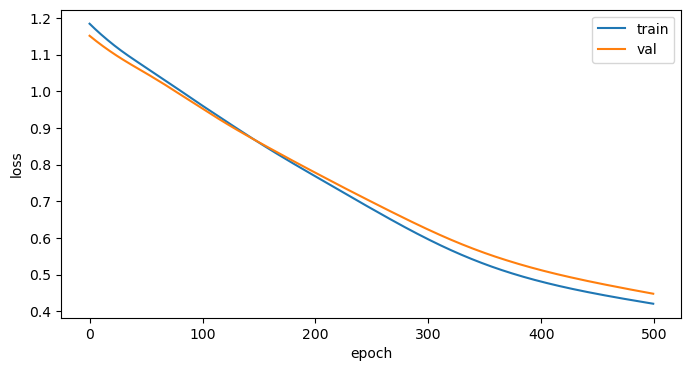

In [24]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 함수형 

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

In [26]:
len(X_train.columns)

4

In [27]:
X_train.shape[1]

4

In [30]:
inputs = Input(shape=(X_train.shape[1],))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
x = Dense(3, activation='softmax')(x)

In [31]:
model = Model(inputs, x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 16)                80        
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 3)                 27        
                                                                 
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(X_train, y_train, epochs=400, batch_size=150, validation_data=(X_test, y_test))

Epoch 1/400
1/1 [==============================] - ETA: 0s - loss: 1.2125 - accuracy: 0.0000e+00

2024-09-10 09:44:03.227490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:44:03.292164: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:44:03.292244: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 1s 794ms/step - loss: 1.2125 - accuracy: 0.0000e+00 - val_loss: 1.2103 - val_accuracy: 0.0000e+00
Epoch 2/400
1/1 [==============================] - 0s 76ms/step - loss: 1.2061 - accuracy: 0.0000e+00 - val_loss: 1.2040 - val_accuracy: 0.0000e+00
Epoch 3/400
1/1 [==============================] - ETA: 0s - loss: 1.1999 - accuracy: 0.0000e+00

2024-09-10 09:44:03.546406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:44:03.581715: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:44:03.581793: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 93ms/step - loss: 1.1999 - accuracy: 0.0000e+00 - val_loss: 1.1978 - val_accuracy: 0.0000e+00
Epoch 4/400
1/1 [==============================] - 0s 92ms/step - loss: 1.1937 - accuracy: 0.0000e+00 - val_loss: 1.1917 - val_accuracy: 0.0000e+00
Epoch 5/400
1/1 [==============================] - 0s 90ms/step - loss: 1.1876 - accuracy: 0.0000e+00 - val_loss: 1.1857 - val_accuracy: 0.0000e+00
Epoch 6/400
1/1 [==============================] - 0s 85ms/step - loss: 1.1816 - accuracy: 0.0000e+00 - val_loss: 1.1797 - val_accuracy: 0.0000e+00
Epoch 7/400
1/1 [==============================] - 0s 90ms/step - loss: 1.1756 - accuracy: 0.0000e+00 - val_loss: 1.1737 - val_accuracy: 0.0000e+00
Epoch 8/400
1/1 [==============================] - 0s 71ms/step - loss: 1.1697 - accuracy: 0.0000e+00 - val_loss: 1.1678 - val_accuracy: 0.0000e+00
Epoch 9/400
1/1 [==============================] - 0s 82ms/step - loss: 1.1638 - accuracy: 0.0000e+00 - val_loss: 1.1619 - v

1/1 [==============================] - 0s 99ms/step - loss: 0.9394 - accuracy: 0.6762 - val_loss: 0.9498 - val_accuracy: 0.6000
Epoch 61/400
1/1 [==============================] - 0s 75ms/step - loss: 0.9357 - accuracy: 0.6762 - val_loss: 0.9463 - val_accuracy: 0.6000
Epoch 62/400
1/1 [==============================] - 0s 71ms/step - loss: 0.9320 - accuracy: 0.6762 - val_loss: 0.9428 - val_accuracy: 0.6000
Epoch 63/400
1/1 [==============================] - 0s 84ms/step - loss: 0.9284 - accuracy: 0.6762 - val_loss: 0.9393 - val_accuracy: 0.6000
Epoch 64/400
1/1 [==============================] - 0s 73ms/step - loss: 0.9247 - accuracy: 0.6857 - val_loss: 0.9358 - val_accuracy: 0.6000
Epoch 65/400
1/1 [==============================] - 0s 74ms/step - loss: 0.9211 - accuracy: 0.6857 - val_loss: 0.9324 - val_accuracy: 0.6000
Epoch 66/400
1/1 [==============================] - 0s 77ms/step - loss: 0.9174 - accuracy: 0.6857 - val_loss: 0.9291 - val_accuracy: 0.6000
Epoch 67/400
1/1 [========

Epoch 118/400
1/1 [==============================] - 0s 87ms/step - loss: 0.7748 - accuracy: 0.6857 - val_loss: 0.7968 - val_accuracy: 0.6222
Epoch 119/400
1/1 [==============================] - 0s 80ms/step - loss: 0.7724 - accuracy: 0.6857 - val_loss: 0.7945 - val_accuracy: 0.6222
Epoch 120/400
1/1 [==============================] - 0s 111ms/step - loss: 0.7699 - accuracy: 0.6857 - val_loss: 0.7923 - val_accuracy: 0.6222
Epoch 121/400
1/1 [==============================] - 0s 124ms/step - loss: 0.7675 - accuracy: 0.6857 - val_loss: 0.7900 - val_accuracy: 0.6222
Epoch 122/400
1/1 [==============================] - 0s 101ms/step - loss: 0.7651 - accuracy: 0.6857 - val_loss: 0.7877 - val_accuracy: 0.6222
Epoch 123/400
1/1 [==============================] - 0s 82ms/step - loss: 0.7628 - accuracy: 0.6857 - val_loss: 0.7855 - val_accuracy: 0.6222
Epoch 124/400
1/1 [==============================] - 0s 111ms/step - loss: 0.7604 - accuracy: 0.6857 - val_loss: 0.7832 - val_accuracy: 0.6222
Ep

1/1 [==============================] - 0s 87ms/step - loss: 0.6288 - accuracy: 0.8476 - val_loss: 0.6578 - val_accuracy: 0.6889
Epoch 176/400
1/1 [==============================] - 0s 75ms/step - loss: 0.6261 - accuracy: 0.8476 - val_loss: 0.6552 - val_accuracy: 0.6889
Epoch 177/400
1/1 [==============================] - 0s 76ms/step - loss: 0.6235 - accuracy: 0.8476 - val_loss: 0.6526 - val_accuracy: 0.6889
Epoch 178/400
1/1 [==============================] - 0s 79ms/step - loss: 0.6208 - accuracy: 0.8476 - val_loss: 0.6500 - val_accuracy: 0.7111
Epoch 179/400
1/1 [==============================] - 0s 80ms/step - loss: 0.6181 - accuracy: 0.8476 - val_loss: 0.6474 - val_accuracy: 0.7111
Epoch 180/400
1/1 [==============================] - 0s 83ms/step - loss: 0.6153 - accuracy: 0.8476 - val_loss: 0.6448 - val_accuracy: 0.7111
Epoch 181/400
1/1 [==============================] - 0s 78ms/step - loss: 0.6126 - accuracy: 0.8476 - val_loss: 0.6422 - val_accuracy: 0.7111
Epoch 182/400
1/1 [=

Epoch 233/400
1/1 [==============================] - 0s 75ms/step - loss: 0.4602 - accuracy: 0.9429 - val_loss: 0.4896 - val_accuracy: 0.9333
Epoch 234/400
1/1 [==============================] - 0s 80ms/step - loss: 0.4571 - accuracy: 0.9429 - val_loss: 0.4866 - val_accuracy: 0.9333
Epoch 235/400
1/1 [==============================] - 0s 82ms/step - loss: 0.4541 - accuracy: 0.9429 - val_loss: 0.4836 - val_accuracy: 0.9333
Epoch 236/400
1/1 [==============================] - 0s 80ms/step - loss: 0.4511 - accuracy: 0.9429 - val_loss: 0.4805 - val_accuracy: 0.9333
Epoch 237/400
1/1 [==============================] - 0s 80ms/step - loss: 0.4480 - accuracy: 0.9429 - val_loss: 0.4774 - val_accuracy: 0.9333
Epoch 238/400
1/1 [==============================] - 0s 82ms/step - loss: 0.4450 - accuracy: 0.9429 - val_loss: 0.4742 - val_accuracy: 0.9333
Epoch 239/400
1/1 [==============================] - 0s 65ms/step - loss: 0.4421 - accuracy: 0.9429 - val_loss: 0.4711 - val_accuracy: 0.9333
Epoch 

Epoch 291/400
1/1 [==============================] - 0s 111ms/step - loss: 0.3049 - accuracy: 0.9714 - val_loss: 0.3212 - val_accuracy: 0.9556
Epoch 292/400
1/1 [==============================] - 0s 110ms/step - loss: 0.3026 - accuracy: 0.9714 - val_loss: 0.3187 - val_accuracy: 0.9556
Epoch 293/400
1/1 [==============================] - 0s 67ms/step - loss: 0.3003 - accuracy: 0.9714 - val_loss: 0.3161 - val_accuracy: 0.9556
Epoch 294/400
1/1 [==============================] - 0s 84ms/step - loss: 0.2981 - accuracy: 0.9714 - val_loss: 0.3136 - val_accuracy: 0.9556
Epoch 295/400
1/1 [==============================] - 0s 73ms/step - loss: 0.2958 - accuracy: 0.9714 - val_loss: 0.3111 - val_accuracy: 0.9556
Epoch 296/400
1/1 [==============================] - 0s 84ms/step - loss: 0.2936 - accuracy: 0.9714 - val_loss: 0.3087 - val_accuracy: 0.9556
Epoch 297/400
1/1 [==============================] - 0s 80ms/step - loss: 0.2915 - accuracy: 0.9714 - val_loss: 0.3062 - val_accuracy: 0.9556
Epoc

1/1 [==============================] - 0s 84ms/step - loss: 0.2032 - accuracy: 0.9714 - val_loss: 0.2107 - val_accuracy: 0.9778
Epoch 349/400
1/1 [==============================] - 0s 96ms/step - loss: 0.2019 - accuracy: 0.9714 - val_loss: 0.2092 - val_accuracy: 0.9778
Epoch 350/400
1/1 [==============================] - 0s 110ms/step - loss: 0.2006 - accuracy: 0.9714 - val_loss: 0.2077 - val_accuracy: 0.9778
Epoch 351/400
1/1 [==============================] - 0s 99ms/step - loss: 0.1992 - accuracy: 0.9714 - val_loss: 0.2063 - val_accuracy: 0.9778
Epoch 352/400
1/1 [==============================] - 0s 100ms/step - loss: 0.1979 - accuracy: 0.9714 - val_loss: 0.2049 - val_accuracy: 0.9778
Epoch 353/400
1/1 [==============================] - 0s 79ms/step - loss: 0.1967 - accuracy: 0.9714 - val_loss: 0.2034 - val_accuracy: 0.9778
Epoch 354/400
1/1 [==============================] - 0s 78ms/step - loss: 0.1954 - accuracy: 0.9714 - val_loss: 0.2020 - val_accuracy: 0.9778
Epoch 355/400
1/1 

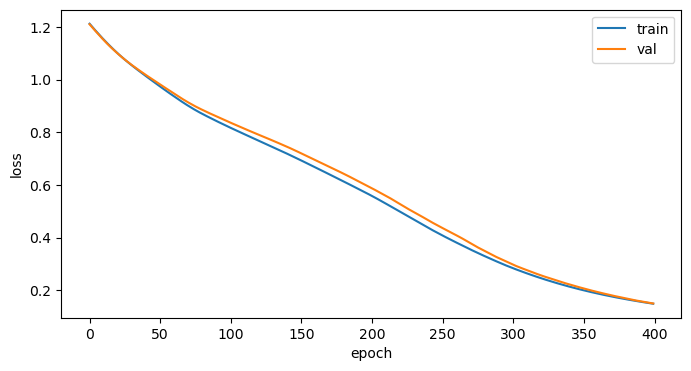

In [33]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 클래스형

In [54]:
import tensorflow as tf

In [34]:
class Iris(Model):
    def __init__(self):
        super(Iris, self).__init__()
        self.dense1 = Dense(16, activation='relu')
        self.dense2 = Dense(8, activation='relu')
        self.classifier = Dense(3, activation='softmax')
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.classifier(x)

In [35]:
y_train

,Iris-setosa,Iris-versicolor,Iris-virginica
32,True,False,False
52,False,True,False
70,False,True,False
121,False,False,True
144,False,False,True
...,...,...,...
113,False,False,True
64,False,True,False
15,True,False,False
125,False,False,True


In [36]:
model = Iris()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=500, batch_size=150, validation_data=(X_test, y_test))

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 1.1137 - accuracy: 0.3429

2024-09-10 09:45:54.503546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:45:54.567886: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:45:54.567971: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 1s 789ms/step - loss: 1.1137 - accuracy: 0.3429 - val_loss: 1.1200 - val_accuracy: 0.3111
Epoch 2/500
1/1 [==============================] - 0s 64ms/step - loss: 1.1106 - accuracy: 0.3429 - val_loss: 1.1175 - val_accuracy: 0.3111
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 1.1075 - accuracy: 0.3429

2024-09-10 09:45:54.794135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:45:54.829683: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:45:54.829779: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 91ms/step - loss: 1.1075 - accuracy: 0.3429 - val_loss: 1.1149 - val_accuracy: 0.3111
Epoch 4/500
1/1 [==============================] - 0s 100ms/step - loss: 1.1046 - accuracy: 0.3429 - val_loss: 1.1125 - val_accuracy: 0.3111
Epoch 5/500
1/1 [==============================] - 0s 90ms/step - loss: 1.1018 - accuracy: 0.3429 - val_loss: 1.1103 - val_accuracy: 0.3111
Epoch 6/500
1/1 [==============================] - 0s 85ms/step - loss: 1.0993 - accuracy: 0.3429 - val_loss: 1.1083 - val_accuracy: 0.3111
Epoch 7/500
1/1 [==============================] - 0s 77ms/step - loss: 1.0968 - accuracy: 0.3429 - val_loss: 1.1063 - val_accuracy: 0.3111
Epoch 8/500
1/1 [==============================] - 0s 77ms/step - loss: 1.0944 - accuracy: 0.3429 - val_loss: 1.1044 - val_accuracy: 0.3111
Epoch 9/500
1/1 [==============================] - 0s 72ms/step - loss: 1.0921 - accuracy: 0.3429 - val_loss: 1.1024 - val_accuracy: 0.3111
Epoch 10/500
1/1 [=============

1/1 [==============================] - 0s 100ms/step - loss: 0.9705 - accuracy: 0.6857 - val_loss: 0.9947 - val_accuracy: 0.6222
Epoch 62/500
1/1 [==============================] - 0s 68ms/step - loss: 0.9679 - accuracy: 0.6857 - val_loss: 0.9923 - val_accuracy: 0.6222
Epoch 63/500
1/1 [==============================] - 0s 70ms/step - loss: 0.9653 - accuracy: 0.6857 - val_loss: 0.9900 - val_accuracy: 0.6222
Epoch 64/500
1/1 [==============================] - 0s 97ms/step - loss: 0.9626 - accuracy: 0.6857 - val_loss: 0.9876 - val_accuracy: 0.6222
Epoch 65/500
1/1 [==============================] - 0s 103ms/step - loss: 0.9600 - accuracy: 0.6857 - val_loss: 0.9852 - val_accuracy: 0.6222
Epoch 66/500
1/1 [==============================] - 0s 113ms/step - loss: 0.9573 - accuracy: 0.6857 - val_loss: 0.9828 - val_accuracy: 0.6222
Epoch 67/500
1/1 [==============================] - 0s 72ms/step - loss: 0.9546 - accuracy: 0.6857 - val_loss: 0.9803 - val_accuracy: 0.6222
Epoch 68/500
1/1 [=====

Epoch 119/500
1/1 [==============================] - 0s 79ms/step - loss: 0.7880 - accuracy: 0.6857 - val_loss: 0.8197 - val_accuracy: 0.6222
Epoch 120/500
1/1 [==============================] - 0s 74ms/step - loss: 0.7844 - accuracy: 0.6857 - val_loss: 0.8162 - val_accuracy: 0.6222
Epoch 121/500
1/1 [==============================] - 0s 92ms/step - loss: 0.7808 - accuracy: 0.6857 - val_loss: 0.8128 - val_accuracy: 0.6222
Epoch 122/500
1/1 [==============================] - 0s 73ms/step - loss: 0.7772 - accuracy: 0.6857 - val_loss: 0.8094 - val_accuracy: 0.6222
Epoch 123/500
1/1 [==============================] - 0s 81ms/step - loss: 0.7736 - accuracy: 0.6857 - val_loss: 0.8059 - val_accuracy: 0.6222
Epoch 124/500
1/1 [==============================] - 0s 77ms/step - loss: 0.7701 - accuracy: 0.6857 - val_loss: 0.8025 - val_accuracy: 0.6222
Epoch 125/500
1/1 [==============================] - 0s 73ms/step - loss: 0.7665 - accuracy: 0.6857 - val_loss: 0.7990 - val_accuracy: 0.6222
Epoch 

Epoch 177/500
1/1 [==============================] - 0s 78ms/step - loss: 0.5940 - accuracy: 0.7429 - val_loss: 0.6316 - val_accuracy: 0.6667
Epoch 178/500
1/1 [==============================] - 0s 77ms/step - loss: 0.5912 - accuracy: 0.7429 - val_loss: 0.6288 - val_accuracy: 0.6667
Epoch 179/500
1/1 [==============================] - 0s 74ms/step - loss: 0.5884 - accuracy: 0.7429 - val_loss: 0.6260 - val_accuracy: 0.6667
Epoch 180/500
1/1 [==============================] - 0s 65ms/step - loss: 0.5857 - accuracy: 0.7429 - val_loss: 0.6233 - val_accuracy: 0.6667
Epoch 181/500
1/1 [==============================] - 0s 82ms/step - loss: 0.5829 - accuracy: 0.7429 - val_loss: 0.6206 - val_accuracy: 0.6667
Epoch 182/500
1/1 [==============================] - 0s 76ms/step - loss: 0.5803 - accuracy: 0.7429 - val_loss: 0.6179 - val_accuracy: 0.6889
Epoch 183/500
1/1 [==============================] - 0s 88ms/step - loss: 0.5776 - accuracy: 0.7429 - val_loss: 0.6153 - val_accuracy: 0.6889
Epoch 

1/1 [==============================] - 0s 109ms/step - loss: 0.4718 - accuracy: 0.8381 - val_loss: 0.5092 - val_accuracy: 0.7333
Epoch 235/500
1/1 [==============================] - 0s 101ms/step - loss: 0.4702 - accuracy: 0.8381 - val_loss: 0.5075 - val_accuracy: 0.7333
Epoch 236/500
1/1 [==============================] - 0s 93ms/step - loss: 0.4687 - accuracy: 0.8381 - val_loss: 0.5059 - val_accuracy: 0.7333
Epoch 237/500
1/1 [==============================] - 0s 101ms/step - loss: 0.4671 - accuracy: 0.8381 - val_loss: 0.5043 - val_accuracy: 0.7333
Epoch 238/500
1/1 [==============================] - 0s 104ms/step - loss: 0.4656 - accuracy: 0.8476 - val_loss: 0.5027 - val_accuracy: 0.7333
Epoch 239/500
1/1 [==============================] - 0s 89ms/step - loss: 0.4641 - accuracy: 0.8476 - val_loss: 0.5012 - val_accuracy: 0.7556
Epoch 240/500
1/1 [==============================] - 0s 120ms/step - loss: 0.4625 - accuracy: 0.8476 - val_loss: 0.4996 - val_accuracy: 0.7556
Epoch 241/500
1

1/1 [==============================] - 0s 112ms/step - loss: 0.3969 - accuracy: 0.9143 - val_loss: 0.4305 - val_accuracy: 0.9333
Epoch 292/500
1/1 [==============================] - 0s 119ms/step - loss: 0.3957 - accuracy: 0.9143 - val_loss: 0.4292 - val_accuracy: 0.9333
Epoch 293/500
1/1 [==============================] - 0s 107ms/step - loss: 0.3946 - accuracy: 0.9143 - val_loss: 0.4280 - val_accuracy: 0.9333
Epoch 294/500
1/1 [==============================] - 0s 102ms/step - loss: 0.3934 - accuracy: 0.9143 - val_loss: 0.4268 - val_accuracy: 0.9333
Epoch 295/500
1/1 [==============================] - 0s 109ms/step - loss: 0.3922 - accuracy: 0.9143 - val_loss: 0.4255 - val_accuracy: 0.9333
Epoch 296/500
1/1 [==============================] - 0s 102ms/step - loss: 0.3911 - accuracy: 0.9143 - val_loss: 0.4243 - val_accuracy: 0.9333
Epoch 297/500
1/1 [==============================] - 0s 113ms/step - loss: 0.3899 - accuracy: 0.9238 - val_loss: 0.4230 - val_accuracy: 0.9333
Epoch 298/500

Epoch 349/500
1/1 [==============================] - 0s 89ms/step - loss: 0.3319 - accuracy: 0.9524 - val_loss: 0.3602 - val_accuracy: 0.9556
Epoch 350/500
1/1 [==============================] - 0s 90ms/step - loss: 0.3308 - accuracy: 0.9524 - val_loss: 0.3590 - val_accuracy: 0.9556
Epoch 351/500
1/1 [==============================] - 0s 84ms/step - loss: 0.3297 - accuracy: 0.9524 - val_loss: 0.3578 - val_accuracy: 0.9556
Epoch 352/500
1/1 [==============================] - 0s 98ms/step - loss: 0.3286 - accuracy: 0.9524 - val_loss: 0.3565 - val_accuracy: 0.9556
Epoch 353/500
1/1 [==============================] - 0s 74ms/step - loss: 0.3275 - accuracy: 0.9524 - val_loss: 0.3553 - val_accuracy: 0.9556
Epoch 354/500
1/1 [==============================] - 0s 85ms/step - loss: 0.3264 - accuracy: 0.9524 - val_loss: 0.3541 - val_accuracy: 0.9556
Epoch 355/500
1/1 [==============================] - 0s 76ms/step - loss: 0.3253 - accuracy: 0.9524 - val_loss: 0.3528 - val_accuracy: 0.9556
Epoch 

Epoch 407/500
1/1 [==============================] - 0s 83ms/step - loss: 0.2692 - accuracy: 0.9619 - val_loss: 0.2909 - val_accuracy: 0.9778
Epoch 408/500
1/1 [==============================] - 0s 93ms/step - loss: 0.2682 - accuracy: 0.9619 - val_loss: 0.2897 - val_accuracy: 0.9778
Epoch 409/500
1/1 [==============================] - 0s 79ms/step - loss: 0.2671 - accuracy: 0.9619 - val_loss: 0.2885 - val_accuracy: 0.9778
Epoch 410/500
1/1 [==============================] - 0s 94ms/step - loss: 0.2661 - accuracy: 0.9619 - val_loss: 0.2873 - val_accuracy: 0.9778
Epoch 411/500
1/1 [==============================] - 0s 101ms/step - loss: 0.2650 - accuracy: 0.9619 - val_loss: 0.2862 - val_accuracy: 0.9778
Epoch 412/500
1/1 [==============================] - 0s 89ms/step - loss: 0.2640 - accuracy: 0.9619 - val_loss: 0.2850 - val_accuracy: 0.9778
Epoch 413/500
1/1 [==============================] - 0s 84ms/step - loss: 0.2630 - accuracy: 0.9619 - val_loss: 0.2838 - val_accuracy: 0.9778
Epoch

1/1 [==============================] - 0s 87ms/step - loss: 0.2149 - accuracy: 0.9714 - val_loss: 0.2301 - val_accuracy: 0.9778
Epoch 465/500
1/1 [==============================] - 0s 94ms/step - loss: 0.2140 - accuracy: 0.9714 - val_loss: 0.2292 - val_accuracy: 0.9778
Epoch 466/500
1/1 [==============================] - 0s 107ms/step - loss: 0.2132 - accuracy: 0.9714 - val_loss: 0.2282 - val_accuracy: 0.9778
Epoch 467/500
1/1 [==============================] - 0s 109ms/step - loss: 0.2124 - accuracy: 0.9714 - val_loss: 0.2273 - val_accuracy: 0.9778
Epoch 468/500
1/1 [==============================] - 0s 94ms/step - loss: 0.2115 - accuracy: 0.9714 - val_loss: 0.2263 - val_accuracy: 0.9778
Epoch 469/500
1/1 [==============================] - 0s 101ms/step - loss: 0.2107 - accuracy: 0.9714 - val_loss: 0.2254 - val_accuracy: 0.9778
Epoch 470/500
1/1 [==============================] - 0s 92ms/step - loss: 0.2099 - accuracy: 0.9714 - val_loss: 0.2244 - val_accuracy: 0.9778
Epoch 471/500
1/1

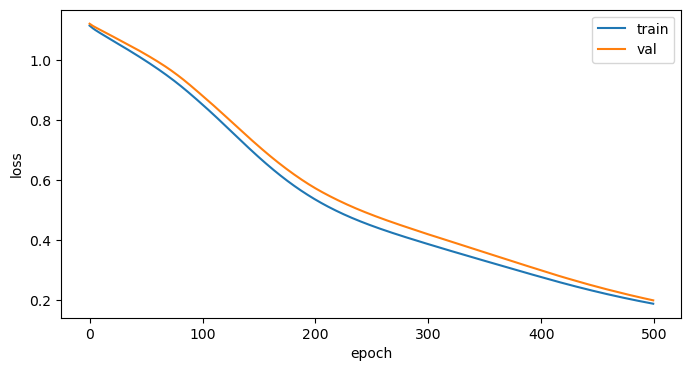

In [37]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()